In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as pl
%matplotlib inline
import csv

import scipy.optimize as op
import scipy.stats
from scipy.optimize import curve_fit
import scipy.io
from scipy.stats import rice

import random
import pickle
import seaborn as sns

import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats, wilcoxon,ttest_rel, pearsonr,shapiro,f_oneway, ranksums
from scipy.special import stdtr
import csv
import pandas as pd

from scipy.integrate import quad
import sys 
import os
#sys.path.append(os.path.abspath("/Users/neuroimaging/Desktop/MR-code/Python_Code"))

#from ML_UsefulFunctions import *
#from KidneyROIAnalyses import *

from scipy import special

from scipy.integrate import tplquad

pd.options.display.float_format = '{:.3f}'.format


from sklearn.feature_selection import SequentialFeatureSelector

import warnings
warnings.simplefilter("ignore")


from EllipsoidalSimulationCode import *
from matplotlib import cm

In [2]:
fileloc = '/Users/miraliu/Desktop/Projects/Manuscripts/MultiExp_IVIM/Neural_ContinuousSpectra_ROIs.xlsx'
Data = pd.read_excel(fileloc,sheet_name = 'Spectra') 

In [3]:
CSF = Data.loc[(Data['ROI Classification'] == 'CSF')]
GM = Data.loc[(Data['ROI Classification'] == 'GM')]
WM = Data.loc[(Data['ROI Classification'] == 'WM')]
Infarct = Data.loc[(Data['ROI Classification'] == 'Infarct_mask')]

def splitStates(df):
    df_base = df.loc[(df['state'] == 'baseline')]
    df_hype = df.loc[(df['state'] == 'hypercap')]
    df_mcao = df.loc[(df['state'] == 'pmcao')]
    return df_base, df_hype, df_mcao

CSF_base, CSF_hype, CSF_mcao = splitStates(CSF)
GM_base, GM_hype, GM_mcao = splitStates(GM)
WM_base, WM_hype, WM_mcao = splitStates(WM)


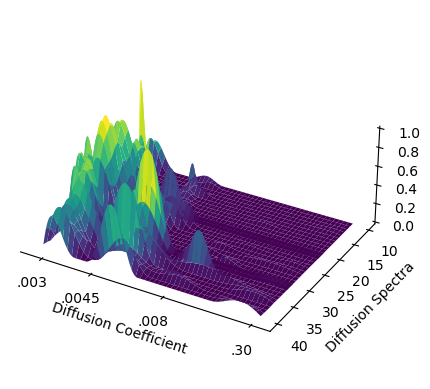

In [4]:
test = CSF_base.iloc[:,5:].to_numpy()/np.max(CSF_base.iloc[:,5:].to_numpy())
ny,nx = np.shape(test)
x,y = range(nx), range(30,30+ny)
X, Y = np.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D
hf = pl.figure()
ha = hf.add_subplot(111, projection='3d')
ha.plot_surface(X, Y, test,cmap=cm.viridis)

test = GM_base.iloc[:,5:].to_numpy()/np.max(GM_base.iloc[:,5:].to_numpy())
ny,nx = np.shape(test)
x,y = range(nx), range(20,20+ny)
X, Y = np.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D
#hf = pl.figure()
#ha = hf.add_subplot(111, projection='3d')
ha.plot_surface(X, Y, test,cmap=cm.viridis)

test = WM_base.iloc[:,5:].to_numpy()/np.max(WM_base.iloc[:,5:].to_numpy())
ny,nx = np.shape(test)
x,y = range(nx), range(10, 10+ny)
X, Y = np.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D
#hf = pl.figure()
#ha = hf.add_subplot(111, projection='3d')
ha.plot_surface(X, Y, test,cmap=cm.viridis)

#test = Infarct.iloc[:,5:].to_numpy()/np.max(Infarct.iloc[:,5:].to_numpy())
#ny,nx = np.shape(test)
#x,y = range(nx), range(ny)
#X, Y = np.meshgrid(x, y)  # `plot_surface` expects `x` and `y` data to be 2D
#hf = pl.figure()
#ha = hf.add_subplot(111, projection='3d')
#ha.plot_surface(X, Y, test,cmap=cm.Wistia)

ha.set_box_aspect(aspect=(2.5, 2, 1)) #changing aspect ratio
ha.view_init(elev=30., azim=120) #changing angle and elevation height
pl.xlabel('Diffusion Coefficient')
pl.ylabel('Diffusion Spectra')
#pl.zlabel('Intensity')
pl.xticks([3, 120, 220, 290], ['.30', '.008', '.0045', '.003'])

# make axes invisible
# make the panes transparent
ha.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ha.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ha.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ha.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ha.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ha.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
pl.savefig('/Users/miraliu/Desktop/test.png',dpi = 1000)
pl.show()

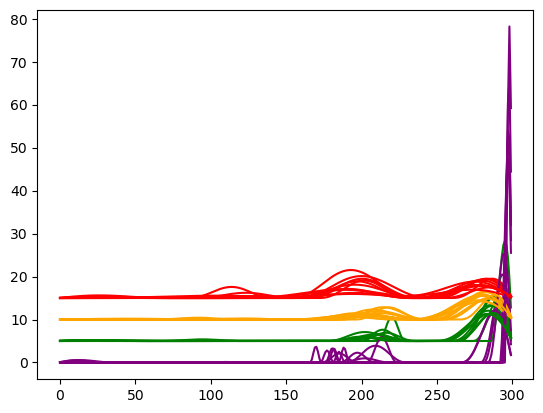

In [5]:
WM_basedata =WM_base.iloc[:,5:].to_numpy()
GM_basedata =GM_base.iloc[:,5:].to_numpy()
CSF_basedata =CSF_base.iloc[:,5:].to_numpy()
Infarct_basedata =Infarct.iloc[:,5:].to_numpy()

#normalize to max peak for simplicity
#WM_basedata = WM_basedata/np.max(WM_basedata)
#GM_basedata = GM_basedata/np.max(GM_basedata)
#CSF_basedata = CSF_basedata/np.max(CSF_basedata)
#Infarct_basedata = Infarct_basedata/np.max(Infarct_basedata)

x = range(300)
for j in range(11):
    pl.plot(x,Infarct_basedata[j],color = 'purple')
    pl.plot(x,WM_basedata[j]+5, color = 'green')
    pl.plot(x,GM_basedata[j]+10, color = 'orange')
    pl.plot(x,CSF_basedata[j]+15, color = 'red')

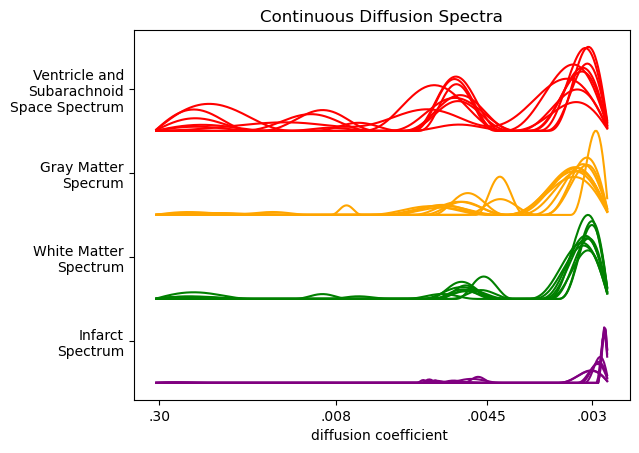

In [9]:
WM_hypedata =WM_hype.iloc[:,5:].to_numpy()
GM_hypedata =GM_hype.iloc[:,5:].to_numpy()
CSF_hypedata =CSF_hype.iloc[:,5:].to_numpy()
Infarct_hypedata =Infarct.iloc[:,5:].to_numpy()

#normalize to max peak for simplicity
WM_hypedata = WM_hypedata/np.max(WM_hypedata)
GM_hypedata = GM_hypedata/np.max(GM_hypedata)
CSF_hypedata = CSF_hypedata/np.max(CSF_hypedata)
Infarct_hypedata = Infarct_hypedata/np.max(Infarct_hypedata)



x = range(1,301)
#x = [1/i for i in x]
for j in range(9):
        pl.plot(x,Infarct_hypedata[j],color = 'purple')
        pl.plot(x,WM_hypedata[j]+1, color = 'green')
        pl.plot(x,GM_hypedata[j]+2, color = 'orange')
        pl.plot(x,CSF_hypedata[j]+3, color = 'red')

        
#pl.legend(bbox_to_anchor = [1, 0.5])
pl.title('Continuous Diffusion Spectra')
pl.xlabel('diffusion coefficient ')
pl.xticks([3, 120, 220, 290], ['.30', '.008', '.0045', '.003'])
pl.yticks([.5, 1.5, 2.5, 3.5], ['Infarct\nSpectrum', 'White Matter\nSpectrum', 'Gray Matter\nSpecrum', 'Ventricle and\nSubarachnoid\nSpace Spectrum'])

pl.savefig('/Users/miraliu/Desktop/test2.png',dpi = 1000)

pl.show()
#pl.hlines(3,0,300,color = 'black',linestyle = '--')


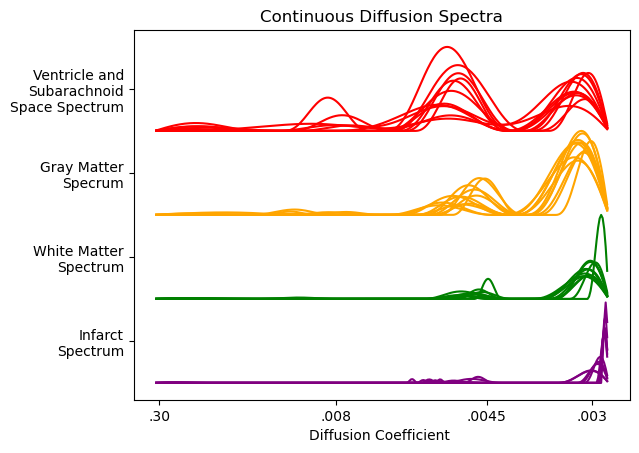

In [7]:
WM_basedata =WM_base.iloc[:,5:].to_numpy()
GM_basedata =GM_base.iloc[:,5:].to_numpy()
CSF_basedata =CSF_base.iloc[:,5:].to_numpy()
Infarct_basedata =Infarct.iloc[:,5:].to_numpy()

#normalize to max peak for simplicity
WM_basedata = WM_basedata/np.max(WM_basedata)
GM_basedata = GM_basedata/np.max(GM_basedata)
CSF_basedata = CSF_basedata/np.max(CSF_basedata)
Infarct_basedata = Infarct_basedata/np.max(Infarct_basedata)



x = range(1,301)
#x = [1/i for i in x]
for j in range(11):
        pl.plot(x,Infarct_basedata[j],color = 'purple')
        pl.plot(x,WM_basedata[j]+1, color = 'green')
        pl.plot(x,GM_basedata[j]+2, color = 'orange')
        pl.plot(x,CSF_basedata[j]+3, color = 'red')

        
#pl.legend(bbox_to_anchor = [1, 0.5])
pl.title('Continuous Diffusion Spectra')
pl.xlabel('Diffusion Coefficient ')
pl.xticks([3, 120, 220, 290], ['.30', '.008', '.0045', '.003'])
pl.yticks([.5, 1.5, 2.5, 3.5], ['Infarct\nSpectrum', 'White Matter\nSpectrum', 'Gray Matter\nSpecrum', 'Ventricle and\nSubarachnoid\nSpace Spectrum'])
pl.show()
#pl.hlines(3,0,300,color = 'black',linestyle = '--')

# both normocapnia and hypercapnia

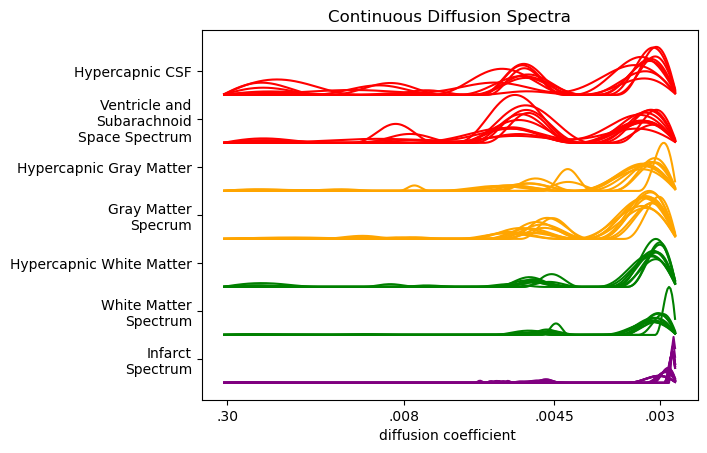

In [8]:
for j in range(9): #hypercapnia
        pl.plot(x,Infarct_hypedata[j],color = 'purple')
        pl.plot(x,WM_hypedata[j]+2, color = 'green')
        pl.plot(x,GM_hypedata[j]+4, color = 'orange')
        pl.plot(x,CSF_hypedata[j]+6, color = 'red')
        
for j in range(11): #baseline
        pl.plot(x,Infarct_basedata[j],color = 'purple')
        pl.plot(x,WM_basedata[j]+1, color = 'green')
        pl.plot(x,GM_basedata[j]+3, color = 'orange')
        pl.plot(x,CSF_basedata[j]+5, color = 'red')

       
    
pl.title('Continuous Diffusion Spectra')
pl.xlabel('diffusion coefficient ')
pl.xticks([3, 120, 220, 290], ['.30', '.008', '.0045', '.003'])
pl.yticks([.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], ['Infarct\nSpectrum', 'White Matter\nSpectrum', 'Hypercapnic White Matter', 'Gray Matter\nSpecrum', 'Hypercapnic Gray Matter', 'Ventricle and\nSubarachnoid\nSpace Spectrum', 'Hypercapnic CSF'])
pl.show()
#pl.hlines(3,0,300,color = 'black',linestyle = '--')